In [270]:
# Schuyler Asplin 953387

import numpy as np
import pandas as pd

from numpy.random import rand as rand
from numpy.random import seed as seed
import matplotlib.pyplot as plt
from IPython.display import clear_output


import linear_regression as LR
import sys

sys.path.append('..')
from misc.utils import MyUtils

# Setup: load datasets

In [37]:
df_X_train = pd.read_csv('houseprice/x_train.csv', header=None)
df_y_train = pd.read_csv('houseprice/y_train.csv', header=None)
df_X_test = pd.read_csv('houseprice/x_test.csv', header=None)
df_y_test = pd.read_csv('houseprice/y_test.csv', header=None)

X_train = df_X_train.to_numpy()
X_test = df_X_test.to_numpy()
n_train = X_train.shape[0]

X_all = MyUtils.normalize_0_1(np.concatenate((X_train, X_test), axis=0))
X_train = X_all[:n_train]
X_test = X_all[n_train:]

y_train = df_y_train.to_numpy()
y_test = df_y_test.to_numpy()


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404, 1)
(102, 13)
(102, 1)


In [38]:
z_r = 3

# CLOSED FORM HP Tests

CF ETA CAN DELETE

In [39]:
# CLOSED FORM ETA TEST

trainedMSE = []
testMSE = []
etaValues = []
for i in range(0,3,1):
    lr = LR.LinearRegression()
    lr.fit(X_train, y_train, CF = True, lam = 0.1, eta = (0.00125*(2**i)), epochs = 100, degree = z_r)
    trainedMSE.append(lr.error(X_train,y_train))
    testMSE.append(lr.error(X_test, y_test))
    etaValues.append(0.00125/(2**i))
for i in range(1,6,1):
    lr = LR.LinearRegression()
    lr.fit(X_train, y_train, CF = True, lam = 0.1, eta = (0.01*i), epochs = 100, degree = z_r)
    trainedMSE.append(lr.error(X_train,y_train))
    testMSE.append(lr.error(X_test, y_test))
    etaValues.append(0.01*i)

print(etaValues)

[0.00125, 0.000625, 0.0003125, 0.01, 0.02, 0.03, 0.04, 0.05]


Text(0.5, 1.0, 'Adjusting ETA in Closed Form:')

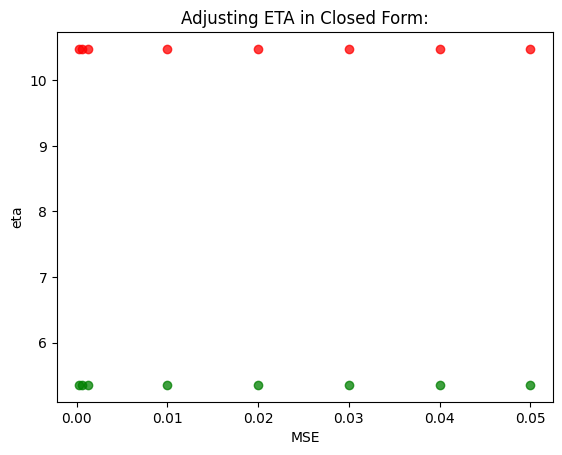

In [40]:
# CLOSED FORM ETA TEST

maxTrain = max(trainedMSE)
maxTest = max(testMSE)
maxY = max(maxTrain,maxTest) 
# print(maxY)
plt.scatter(etaValues,trainedMSE,c="green",alpha=0.75)
plt.scatter(etaValues,testMSE,c="red",alpha=0.75)
plt.xlabel('MSE')
plt.ylabel('eta')
plt.title("Adjusting ETA in Closed Form:")


# show what happens with eta of 7

In [78]:
# CLOSED FORM ETA TEST w/ OUTLIER

trainedMSE = []
testMSE = []
etaValues = []
for i in range(0,3,1):
    lr = LR.LinearRegression()
    lr.fit(X_train, y_train, CF = True, lam = 0.1, eta = (0.00125/(2**i)), epochs = 100, degree = z_r)
    trainedMSE.append(lr.error(X_train,y_train))
    testMSE.append(lr.error(X_test, y_test))
    etaValues.append(0.00125/(2**i))
for i in range(1,7,1):
    lr = LR.LinearRegression()
    lr.fit(X_train, y_train, CF = True, lam = 0.1, eta = (0.01*i), epochs = 100, degree = z_r)
    trainedMSE.append(lr.error(X_train,y_train))
    testMSE.append(lr.error(X_test, y_test))
    etaValues.append(0.01*i)

print(etaValues)

[0.00125, 0.000625, 0.0003125, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]


In [76]:
x = np.array(etaValues)
print(x)

[0.005 0.01  0.02  0.005 0.01  0.02  0.005 0.01  0.02  0.005 0.01  0.02 ]


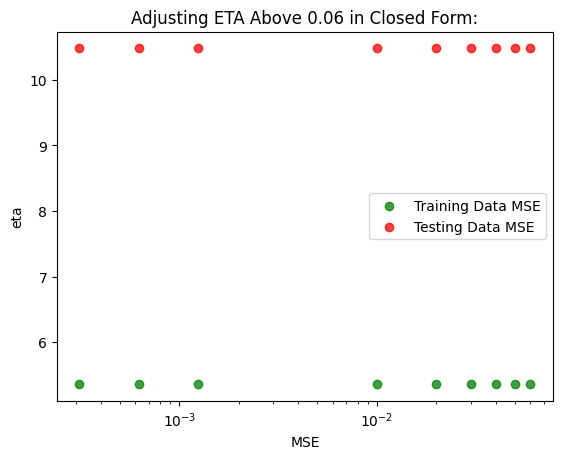

In [80]:
# CLOSED FORM ETA TEST w/ OUTLIER
x = np.array(etaValues)
maxTrain = max(trainedMSE)
maxTest = max(testMSE)
maxY = max(maxTrain,maxTest) 
# print(maxY)
plt.scatter(x,trainedMSE,c="green",alpha=0.75,label="Training Data MSE")
plt.scatter(x,testMSE,c="red",alpha=0.75,label="Testing Data MSE")
plt.xlabel('MSE')
plt.ylabel('eta')
plt.title("Adjusting ETA Above 0.06 in Closed Form:")
plt.legend()
plt.xscale('log')

CF Lam, degree 3 (logarithmic)

In [242]:
# CLOSED FORM LAM TEST

trainedMSE = []
testMSE = []
lamValues = []
lamIncrement = 0.003125
for i in range(1,16,1):
    lr = LR.LinearRegression()
    lr.fit(X_train, y_train, CF = False, lam = lamIncrement, eta = 0.01, epochs = 1000, degree = z_r)
    trainedMSE.append(lr.error(X_train,y_train))
    testMSE.append(lr.error(X_test, y_test))
    lamIncrement *= 2
    lamValues.append(lamIncrement)

print(lamValues)

[0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4]


[23.761040925677825, 23.761624579250363, 23.762791993918817, 23.765127252956844, 23.769799486711936, 23.779150791976026, 23.797880554591273, 23.835447108955435, 23.91099589373079, 24.063659663197633, 24.374526071193273, 25.013279104357224, 26.326739298835122, 28.940813843850417, 33.67821192297269]
23.761040925677825


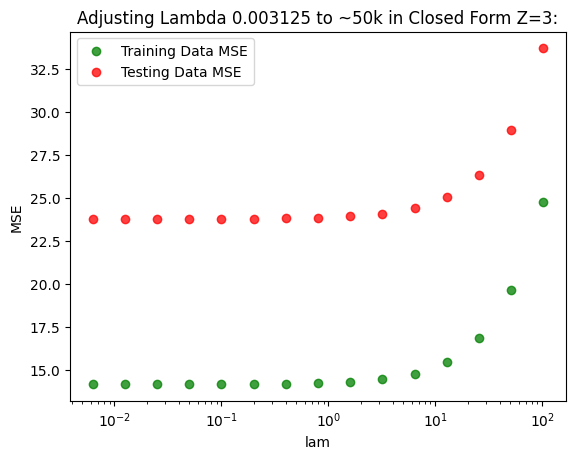

In [243]:
# CLOSED FORM ETA TEST w/ OUTLIER
print(testMSE)
print(min(testMSE))

# print(maxY)
plt.scatter(np.array(lamValues),trainedMSE,c="green",alpha=0.75,label="Training Data MSE")
plt.scatter(np.array(lamValues),testMSE,c="red",alpha=0.75,label="Testing Data MSE")

plt.xlabel('lam')
plt.ylabel('MSE')
plt.title("Adjusting Lambda 0.003125 to ~50k in Closed Form Z=3:")
plt.legend()
plt.xscale('log')

In [88]:
# CLOSED FORM DEGREE AND LAM TEST

trainedMSE = []
testMSE = []
lamValues = []

for z in range(1,5):
    lamIncrement = 0.003125
    for i in range(1,21,2):
        lr = LR.LinearRegression()
        lr.fit(X_train, y_train, CF = False, lam = lamIncrement, eta = 0.01, epochs = 500, degree = z)
        trainedMSE.append(lr.error(X_train,y_train))
        testMSE.append(lr.error(X_test, y_test))
        lamIncrement *= 2
        lamValues.append(lamIncrement)

print(lamValues)

[0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2]


In [97]:
# x = np.array([0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2])
# print(len(x),len(testMSE))


40


([<matplotlib.axis.XTick at 0x7f8020c151c0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40')])

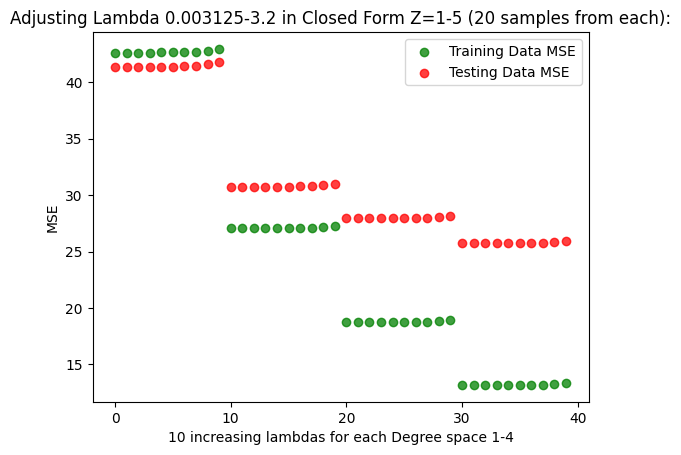

In [138]:
# CLOSED FORM DEGREE AND LAM TEST

# x = np.array([1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4])
# print(len(trainedMSE))
# print(maxY)
plt.scatter(range(0,len(trainedMSE)),trainedMSE,c="green",alpha=0.75,label="Training Data MSE")
plt.scatter(range(0,len(trainedMSE)),testMSE,c="red",alpha=0.75,label="Testing Data MSE")

plt.xlabel('10 increasing lambdas for each Degree space 1-4')
plt.ylabel('MSE')
plt.title("Adjusting Lambda 0.003125-3.2 in Closed Form Z=1-5 (20 samples from each):")
plt.legend()

plt.xticks(np.arange(0,41,10))
# cant figure out how to make it evenly space 1,2,3,4 for degree spaces

CF lam, degree 1-4

In [139]:

trainedMSE = []
testMSE = []
lamValues = []

for z in range(1,5):
    lamIncrement = 0.00625
    for i in range(1,21,2):
        lr = LR.LinearRegression()
        lr.fit(X_train, y_train, CF = True, lam = lamIncrement, eta = 0.01, epochs = 500, degree = z)
        trainedMSE.append(lr.error(X_train,y_train))
        testMSE.append(lr.error(X_test, y_test))
        lamValues.append(lamIncrement)
        lamIncrement *= 2
        

print(lamValues)

[0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2]


In [140]:

avgDifPerDegreeSpace = [] # avg of MSEs for a given degree space
# difs = [] # avg difference of MSEs
MSE_Differences = [] # 

for i in range(0,4):
    avgInTrained = sum(trainedMSE[10*i:10*i+10])/10
    avgInTest = sum(testMSE[10*i:10*i+10])/10
    # print(avgInTrained, avgInTest)
    
    # difs.extend([avgInTest-avgInTrained]*10) 
    avgDifPerDegreeSpace.extend([(avgInTrained+avgInTest)/2]*10)
# print(avgDifPerDegreeSpace)
# print(f"\n\n{difs}")
for i in range(0,40):
    dif = (trainedMSE[i]-testMSE[i])
    difFromZSpaceAvg = avgDifPerDegreeSpace[i%10]+dif
    MSE_Differences.append(difFromZSpaceAvg)



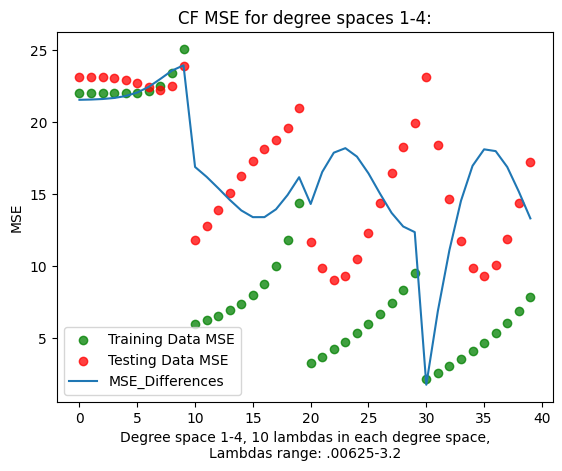

In [147]:
# np.array(lamValues)
plt.scatter(range(0,len(trainedMSE)),trainedMSE,c="green",alpha=0.75,label="Training Data MSE")
plt.scatter(range(0,len(trainedMSE)),testMSE,c="red",alpha=0.75,label="Testing Data MSE")
plt.plot(MSE_Differences, label="MSE_Differences")

plt.xlabel('Degree space 1-4, 10 lambdas in each degree space\nLambdas range: .00625-3.2')
plt.ylabel('MSE')
plt.title("CF MSE for degree spaces 1-4 & increasing lambdas:")
plt.legend()


# GRADIENT DESCENT HP tests

In [247]:
# Gradient Descent JUST DEGREE

trainedMSE = []
testMSE = []
degreeSpace = []

for z in range(1,5):
    # for i in range(1,21,2):
    lr = LR.LinearRegression()
    lr.fit(X_train, y_train, CF = False, lam = 0.1, eta = 0.01, epochs = 1000, degree = z)
    trainedMSE.append(lr.error(X_train,y_train))
    testMSE.append(lr.error(X_test, y_test))
    # lamIncrement *= 2
    degreeSpace.append(z)

GD degree only

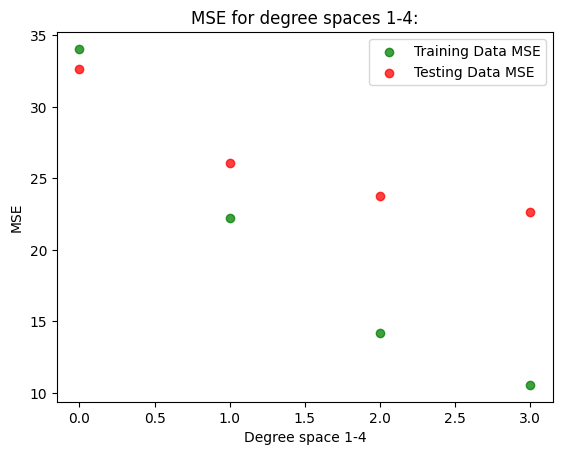

In [248]:
# GRADIENT DESCENT DEGREE 1-4 TEST

plt.scatter(range(0,len(trainedMSE)),trainedMSE,c="green",alpha=0.75,label="Training Data MSE")
plt.scatter(range(0,len(trainedMSE)),testMSE,c="red",alpha=0.75,label="Testing Data MSE")


plt.xlabel('Degree space 1-4')
plt.ylabel('MSE')
plt.title("MSE for degree spaces 1-4:")
plt.legend()

GD lam, degree 1-4

In [249]:

# Gradient Descent lam and DEGREE

trainedMSE = []
testMSE = []
lamValues = []

for z in range(1,5):
    lamIncrement = 0.00625
    for i in range(1,21,2):
        lr = LR.LinearRegression()
        lr.fit(X_train, y_train, CF = False, lam = lamIncrement, eta = 0.01, epochs = 700, degree = z)
        trainedMSE.append(lr.error(X_train,y_train))
        testMSE.append(lr.error(X_test, y_test))
        lamValues.append(lamIncrement)
        lamIncrement *= 2
        

# print(lamValues)

In [262]:
print(lamValues)

[0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2]


In [250]:

avgDifPerDegreeSpace = [] # avg of MSEs for a given degree space
# difs = [] # avg difference of MSEs
MSE_Differences = [] # 

for i in range(0,4):
    avgInTrained = sum(trainedMSE[10*i:10*i+10])/10
    avgInTest = sum(testMSE[10*i:10*i+10])/10
    # print(avgInTrained, avgInTest)
    
    # difs.extend([avgInTest-avgInTrained]*10) 
    avgDifPerDegreeSpace.extend([(avgInTrained+avgInTest)/2]*10)
# print(avgDifPerDegreeSpace)
# print(f"\n\n{difs}")
for i in range(0,40):
    dif = (trainedMSE[i]-testMSE[i])
    difFromZSpaceAvg = avgDifPerDegreeSpace[i%10]+dif
    MSE_Differences.append(difFromZSpaceAvg)



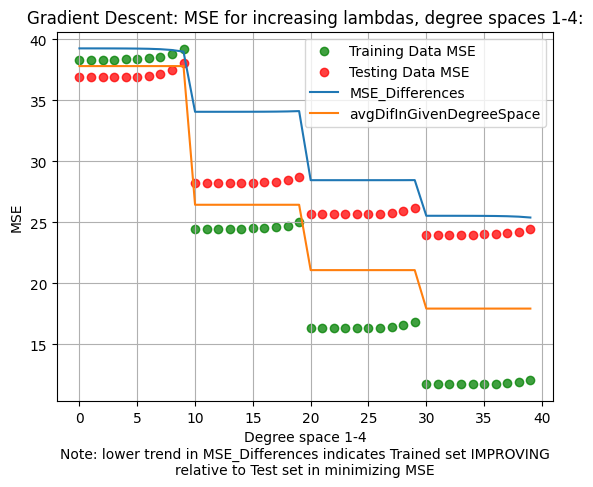

In [251]:
# GRADIENT DESCENT DEGREE 1-4 TEST

plt.title("Gradient Descent: MSE for increasing lambdas, degree spaces 1-4:")

plt.xlabel('Degree space 1-4\nNote: lower trend in MSE_Differences indicates Trained set IMPROVING\nrelative to Test set in minimizing MSE')
plt.ylabel('MSE')

plt.scatter(range(0,len(trainedMSE)),trainedMSE,c="green",alpha=0.75,label="Training Data MSE")
plt.scatter(range(0,len(trainedMSE)),testMSE,c="red",alpha=0.75, label="Testing Data MSE")

plt.plot(MSE_Differences, label="MSE_Differences")
plt.plot(avgDifPerDegreeSpace, label="avgDifInGivenDegreeSpace")

# plt.xticks(np.arange(1,5,1))
plt.legend()
plt.grid(True)

GD eta

In [252]:
# GD eta testing through degree spaces

trainedMSE = []
testMSE = []
etaValues = []

for z in range(1,5):
    etaTracker = 0.005
    for i in range(1,4,1):
        # at 5, MSE shoots way way up 
        lr = LR.LinearRegression()
        lr.fit(X_train, y_train, CF = False, lam = 0.1, eta = etaTracker, epochs = 500, degree = z)
        trainedMSE.append(lr.error(X_train,y_train))
        testMSE.append(lr.error(X_test, y_test))
        etaValues.append(etaTracker)
        etaTracker *= 2

print(etaValues)

[0.005, 0.01, 0.02, 0.005, 0.01, 0.02, 0.005, 0.01, 0.02, 0.005, 0.01, 0.02]


In [253]:
print(testMSE)

[52.59368819917923, 41.378021433677155, 32.65261348148446, 37.519930992272336, 30.75136294511948, 26.036238415157207, 33.90318337699993, 27.964103457438792, 23.776678419532107, 31.251280553676807, 25.758454324598777, 22.65844988299179]


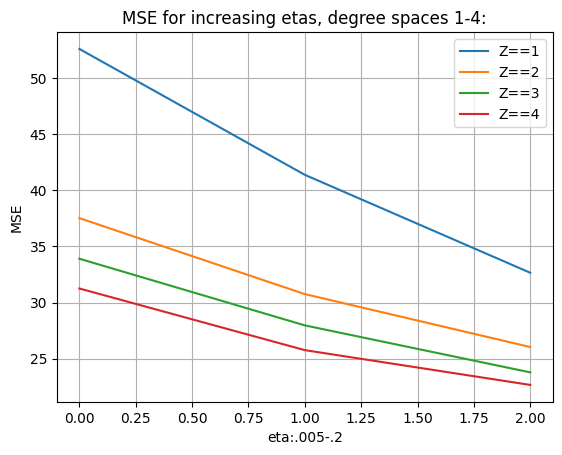

In [254]:
# plt.scatter(range(0,len(trainedMSE)),trainedMSE,c="green",alpha=0.75,label="Training Data MSE")
# plt.scatter(range(0,len(trainedMSE)),testMSE,c="red",alpha=0.75, label="Testing Data MSE")
plt.plot(testMSE[0:3], label="Z==1")
plt.plot(testMSE[3:6], label="Z==2")
plt.plot(testMSE[6:9], label="Z==3")
plt.plot(testMSE[9:12], label="Z==4")
# plt.plot(MSE_Differences, label="MSE_Differences")
# plt.text(0,0,"lower trend in MSE_Differences indicates Trained set improving relative to Test set in minimizing MSE")
plt.xlabel('eta:.005-.2')
        #    Note: lower trend in MSE_Differences indicates Trained set IMPROVING\nrelative to Test set in minimizing MSE')
plt.ylabel('MSE')
plt.title("MSE for increasing etas, degree spaces 1-4:")
plt.legend()
plt.grid(True)

In [255]:
# plt.plot(lr.w, label="w (line of best fit)")
# plt.scatter(range(0,len(X_test[0:200])),range(0,len(X_test[0:200]), label="X_test"))
# plt.scatter(range(0,len(y_test[0:200])), y_test[0:200], label="y_test")


GD Epochs

In [256]:
# GD eta testing through degree spaces

trainedMSE = []
testMSE = []
epochValues = []

# for z in range(1,5):
# etaTracker = 0.005
epochsTracker = 50

for i in range(1,17,1): # 50 1600
    # at 5, MSE shoots way way up 
    lr = LR.LinearRegression()
    lr.fit(X_train, y_train, CF = False, lam = 0.1, eta = 0.02, epochs = epochsTracker, degree = 3)
    trainedMSE.append(lr.error(X_train,y_train))
    testMSE.append(lr.error(X_test, y_test))
    epochValues.append(epochsTracker)
    epochsTracker *= 2



In [257]:
# print(epochValues)
x = np.array(epochValues)
print (len(trainedMSE), len(testMSE), len(x))
print(epochValues)

16 16 16
[50, 100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 51200, 102400, 204800, 409600, 819200, 1638400]


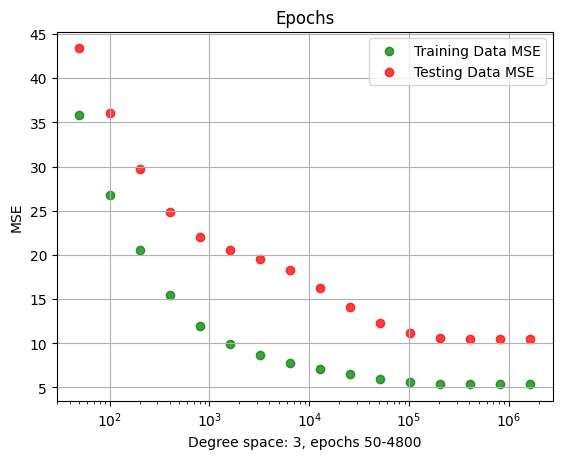

In [258]:
plt.scatter(np.array(epochValues),trainedMSE,c="green",alpha=0.75,label="Training Data MSE")
plt.scatter(np.array(epochValues),testMSE,c="red",alpha=0.75, label="Testing Data MSE")
# plt.plot(MSE_Differences, label="MSE_Differences")
# plt.text(0,0,"lower trend in MSE_Differences indicates Trained set improving relative to Test set in minimizing MSE")
plt.xlabel('Degree space: 3, epochs 50-4800')
        #    Note: lower trend in MSE_Differences indicates Trained set IMPROVING\nrelative to Test set in minimizing MSE')
plt.ylabel('MSE')
plt.title("Epochs")
plt.legend()
plt.grid(True)
plt.xscale('log')


In [265]:
# epochs == 4000
# z == 4
# lam = 0.0125
# eta
# GD eta testing through degree spaces

trainedMSE = []
testMSE = []
etaValues = []
lambValues = [0.00075,0.001,0.00125,0.0015]

for lamb in range(0,4):
    
    etaTracker = 0.02
    for i in range(1,6,1):
        # at 5, MSE shoots way way up 
        lr = LR.LinearRegression()
        lr.fit(X_train, y_train, CF = False, lam = lambValues[lamb], eta = etaTracker, epochs = 100000, degree = 3)
        trainedMSE.append(lr.error(X_train,y_train))
        testMSE.append(lr.error(X_test, y_test))
        etaValues.append(etaTracker)
        etaTracker += .01

print(etaValues)

/Users/schuylerasplin/EWU_CS/23Winter/ML_439/progs/prog4/code_linear_regression/linear_regression.py:107: RuntimeWarning: overflow encountered in matmul
  self.w = (term1@self.w) + term2
/Users/schuylerasplin/EWU_CS/23Winter/ML_439/progs/prog4/code_linear_regression/linear_regression.py:107: RuntimeWarning: invalid value encountered in matmul
  self.w = (term1@self.w) + term2


[0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


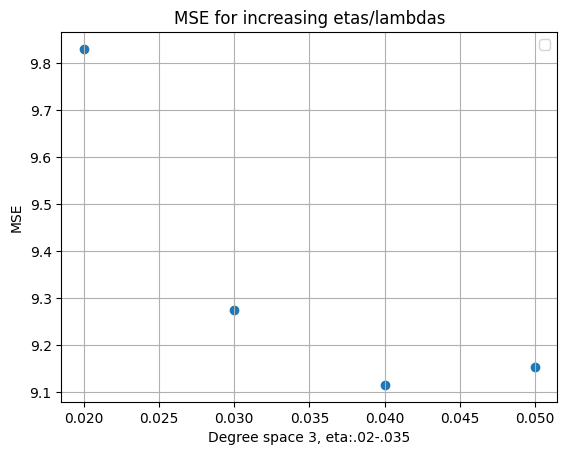

In [269]:
# plt.scatter(range(0,len(trainedMSE)),trainedMSE,c="green",alpha=0.75,label="Training Data MSE")
# plt.scatter(range(0,len(trainedMSE)),testMSE,c="red",alpha=0.75, label="Testing Data MSE")
# plt.plot(testMSE[0:5], label="lam==0.0075")
# plt.plot(testMSE[5:10], label="lam==0.001")
# plt.plot(testMSE[10:15], label="lam==0.00125")
# plt.plot(testMSE[15:20], label="lam==0.0015")
plt.scatter(np.array([0.02, 0.03, 0.04, 0.05, 0.06]),testMSE[5:10])

# plt.plot(MSE_Differences, label="MSE_Differences")
# plt.text(0,0,"lower trend in MSE_Differences indicates Trained set improving relative to Test set in minimizing MSE")
plt.xlabel('Degree space 3, eta:.02-.035')
        #    Note: lower trend in MSE_Differences indicates Trained set IMPROVING\nrelative to Test set in minimizing MSE')
plt.ylabel('MSE')
plt.title("MSE for increasing etas/lambdas")
plt.legend()
plt.grid(True)

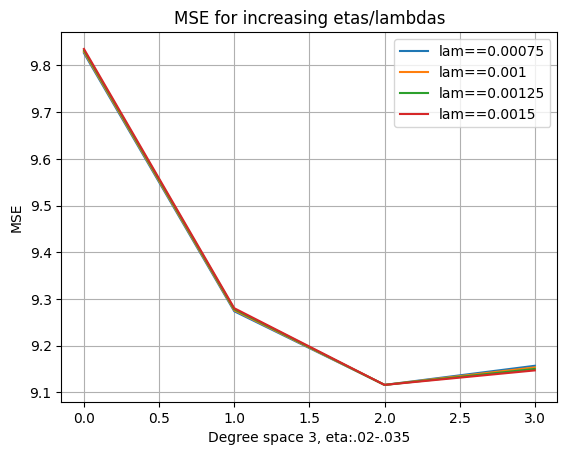

In [267]:

plt.plot(testMSE[0:5], label="lam==0.00075")
plt.plot(testMSE[5:10], label="lam==0.001")
plt.plot(testMSE[10:15], label="lam==0.00125")
plt.plot(testMSE[15:20], label="lam==0.0015")


# plt.plot(MSE_Differences, label="MSE_Differences")
# plt.text(0,0,"lower trend in MSE_Differences indicates Trained set improving relative to Test set in minimizing MSE")
plt.xlabel('Degree space 3, eta:.02-.035')
        #    Note: lower trend in MSE_Differences indicates Trained set IMPROVING\nrelative to Test set in minimizing MSE')
plt.ylabel('MSE')
plt.title("MSE for increasing etas/lambdas")
plt.legend()
plt.grid(True)

# DISPLAY W

In [272]:
# epochs == 1000
# z == 4
# lam = 0.0125
# eta
# GD eta testing through degree spaces


trainedMSE = []
testMSE = []



lr = LR.LinearRegression()
lr.fit(X_train, y_train, CF = False, lam = 0.01, eta = 0.04, epochs = 50000, degree = 3)
trainedMSE.append(lr.error(X_train,y_train))
TrainW = lr.w

testMSE.append(lr.error(X_test, y_test))
TestW = lr.w






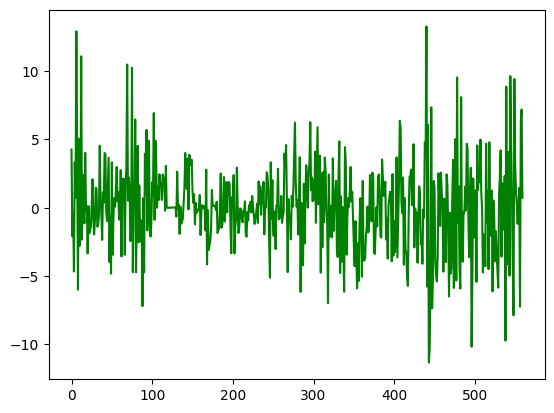

In [275]:
plt.plot(TrainW, color="green")
# plt.plot(TestW, color="blue")
